Calculadora para Manglares Cienaga Grande de Santa Martha

In [13]:
#Operaciones Estadisticas Matematicas y Algebraicas
import numpy.random as rnd
import numpy as np
import math as m
from cmath import sqrt
import pandas as pd
from cmath import sqrt

#Graficar Objetos y Poligonos
from matplotlib.patches import Ellipse
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
#Style
plt.style.use(['default'])
#plt.style.use(['science','ieee'])

Datos de Estructura

Definir los labels de Especies y atributos de la tabla

In [14]:
# Datos Vegtacion CGSM 
dv = pd.read_csv("Datasets/Ecosistemas/Datos-Estructura-CGSM-2017-2018.csv")

In [15]:
dv.describe()

,Circunferencia,DAP,Fromard_1998,Medina_2016,Yepes_2016_A,Yepes_2016_B
count,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000
mean,37.042881,11.790804,78.292704,117.744427,3.720276,92.975131
std,20.123460,6.405563,122.331748,210.975750,1.388004,146.395431
min,7.300000,2.323657,1.055475,1.588327,0.105698,1.111483
25%,21.225000,6.756112,12.643209,18.796045,2.720591,15.188247
50%,35.400000,11.268144,43.936309,55.566960,3.973850,53.182553
75%,46.375000,14.761586,86.903262,111.359968,4.635443,103.065887
max,126.000000,40.100000,985.950728,1713.206408,7.084297,1192.829459


In [16]:
dv.head(2)

,Estacion,Fecha,Especie,Circunferencia,DAP,Fromard_1998,Medina_2016,Yepes_2016_A,Yepes_2016_B
0,Rinconada Parcela 1,2/27/2017,Avicennia,86.0,27.4,394.241362,671.646997,6.148557,467.954858
1,Rinconada Parcela 1,2/27/2017,Avicennia,66.5,21.2,212.685485,357.555162,5.518551,249.232126


In [17]:
dv.loc[:, ['Especie','Yepes_2016_B']]

,Especie,Yepes_2016_B
0,Avicennia,467.954858
1,Avicennia,249.232126
2,Avicennia,8.817278
3,Avicennia,933.449038
4,Avicennia,67.424288
...,...,...
585,Laguncularia,4.569877
586,Laguncularia,8.817278
587,Laguncularia,116.184161
588,Laguncularia,76.212627


C:\Users\jepul\AppData\Local\Temp\ipykernel_13120\2323962694.py:9: MatplotlibDeprecationWarning:

Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().

C:\Users\jepul\AppData\Local\Temp\ipykernel_13120\2323962694.py:17: MatplotlibDeprecationWarning:

Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().



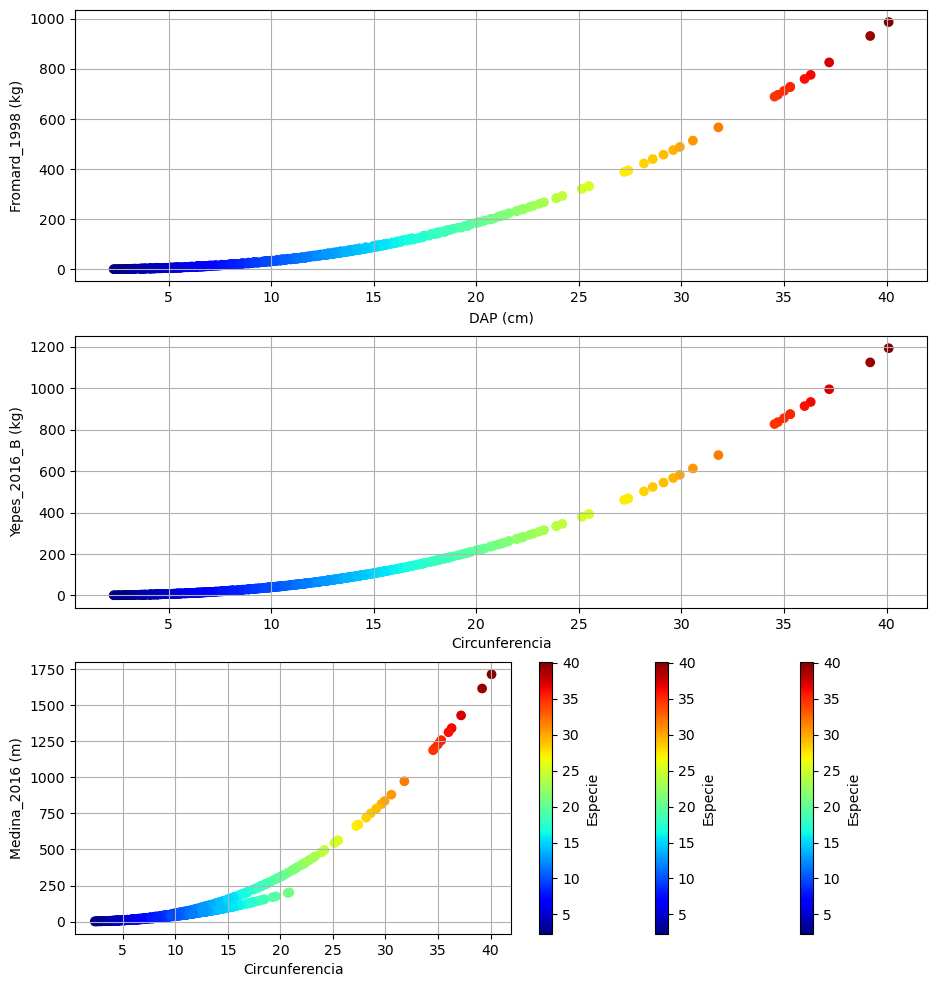

In [37]:
# Figure 1: DAP vs Calculos de Biomasa

fig1,ax = plt.subplots(3,1,figsize=(11,12))
im = ax[0].scatter(dv.DAP,dv.Fromard_1998,c=dv.DAP,cmap='jet')
ax[0].set_xlabel('DAP (cm)')
ax[0].set_ylabel('Fromard_1998 (kg)')
ax[0].grid(True)
#plt.yscale('log')
cbar0 = plt.colorbar(im)
cbar0.set_label('Especie')

im1 = ax[1].scatter(dv.DAP,dv.Yepes_2016_B,c=dv.DAP,cmap='jet')
ax[1].set_xlabel('Circunferencia')
ax[1].set_ylabel('Yepes_2016_B (kg)')
ax[1].grid(True)
# plt.yscale('log')
cbar2 = plt.colorbar(im1)
cbar2.set_label('Especie')

im2 = ax[2].scatter(dv.DAP,dv.Medina_2016,c=dv.DAP,cmap='jet')
ax[2].set_xlabel('Circunferencia')
ax[2].set_ylabel('Medina_2016 (m)')
ax[2].grid(True)
#plt.yscale('log')
cbar1 = plt.colorbar(im2)
cbar1.set_label('Especie')

In [36]:
# 3D representation

fig = px.scatter_3d(dv,x=dv.DAP,y=dv.Circunferencia,z=dv.Medina_2016,color=dv.Especie,
                    log_x=False,width=800, height=800);
fig.show()

In [12]:
#Cantidad de Carbono y  Biomasa de un Poligono (Hectarea) en el tiempo
#Tiempo en years y numero de individuos
N= 1000000
t = 1
#Dimensiones del Poligono en metros (Hectarea)
X = 10000
Y = 10000
#Cantidad de Individuos
N=1
def CO2_BT_Total_dv (X ,Y, N, B, t):
    BT = (N * B * t)
    CT = ((N * B * t)*0.5)
    return BT , CT 


In [6]:
# Calculo de Biomasa y Carbono total del muestreo para una hectarea con 590 inviduos de diferentes especies con un volumen promedio aproximado.
H=CO2_BT_Total_dv(10000,10000,590,dv.Yepes_2016_B.mean(),1)
H

(54855.32719116602, 27427.66359558301)

In [7]:
# Calculo de Biomasa y Carbono total del muestreo 10 inviduos con las caracteristicas del segundo Manglar muestreado
Hi=CO2_BT_Total_dv(10000,10000,10,dv.Yepes_2016_B[2],1)
Hi

(88.17278082, 44.08639041)

In [8]:
#Cantidad de Cabono de poligono en el tiempo como Data Frame
#Tiempo en years y numero de individuos
t = 1
#Cantidad de Individuos
N=1
def CO2_Total_dv (S,X ,Y, N, B, t):
    TC = (N * B * t)
    BT = (N * B * t)*0.5
    return pd.DataFrame(index = [S, BT, TC])

In [9]:
CGSM = CO2_Total_dv(dv.Especie,1,1,1,dv.Yepes_2016_B,5)
CGSM

Empty DataFrame
Columns: []
Index: [(Avicennia, 1169.8871445, 2339.774289), (Avicennia, 623.08031475, 1246.1606295), (Avicennia, 22.043195205, 44.08639041), (Avicennia, 2333.62259425, 4667.2451885), (Avicennia, 168.5607208, 337.1214416), (Avicennia, 979.931115, 1959.86223), (Avicennia, 658.07761975, 1316.1552395), (Avicennia, 81.57041597499999, 163.14083194999998), (Avicennia, 138.545295475, 277.09059095), (Avicennia, 19.0007432075, 38.001486415), (Avicennia, 32.824111025, 65.64822205), (Avicennia, 1417.1097320000001, 2834.2194640000002), (Avicennia, 51.307539225, 102.61507845), (Avicennia, 41.457393975, 82.91478795), (Avicennia, 2186.0288410000003, 4372.057682000001), (Avicennia, 1307.7220754999998, 2615.4441509999997), (Avicennia, 2090.7884475, 4181.576895), (Avicennia, 11.4246918525, 22.849383705), (Avicennia, 111.94703517500001, 223.89407035000002), (Avicennia, 11.4246918525, 22.849383705), (Avicennia, 427.099766, 854.199532), (Avicennia, 239.3393833, 478.6787666), (Avicennia, 1169.8871445, 2339.774289), (Avicennia, 202.11869257499998, 404.23738514999997), (Avicennia, 62.423164675, 124.84632935), (Avicennia, 836.6180730000001, 1673.2361460000002), (Avicennia, 74.850702875, 149.70140575), (Avicennia, 51.307539225, 102.61507845), (Avicennia, 19.0007432075, 38.001486415), (Avicennia, 294.86360924999997, 589.7272184999999), (Avicennia, 2811.1163699999997, 5622.2327399999995), (Avicennia, 266.24524974999997, 532.4904994999999), (Avicennia, 524.79886025, 1049.5977205), (Avicennia, 408.97538525000004, 817.9507705000001), (Avicennia, 41.457393975, 82.91478795), (Avicennia, 1692.84787275, 3385.6957455), (Avicennia, 46.2272656, 92.4545312), (Avicennia, 560.75607425, 1121.5121485), (Avicennia, 220.263874525, 440.52774905), (Avicennia, 706.5120195, 1413.024039), (Avicennia, 30.08056795, 60.1611359), (Avicennia, 309.825133, 619.650266), (Avicennia, 6.007471035, 12.01494207), (Avicennia, 249.89833675, 499.7966735), (Avicennia, 291.9237815, 583.847563), (Avicennia, 2283.79019425, 4567.5803885), (Avicennia, 2138.094803, 4276.189606), (Avicennia, 138.545295475, 277.09059095), (Avicennia, 387.8372925, 775.674585), (Avicennia, 2486.95693225, 4973.9138645), (Avicennia, 567.248248, 1134.496496), (Avicennia, 280.3383245, 560.676649), (Avicennia, 252.58031025000003, 505.16062050000005), (Avicennia, 10.5825936025, 21.165187205), (Avicennia, 6.458652809999999, 12.917305619999999), (Avicennia, 325.22687875, 650.4537575), (Avicennia, 9.390309325, 18.78061865), (Avicennia, 214.11282485, 428.2256497), (Avicennia, 202.11869257499998, 404.23738514999997), (Avicennia, 56.70421695, 113.4084339), (Avicennia, 836.6180730000001, 1673.2361460000002), (Avicennia, 41.457393975, 82.91478795), (Avicennia, 158.168041225, 316.33608245), (Avicennia, 341.07278675000003, 682.1455735000001), (Avicennia, 19.0007432075, 38.001486415), (Avicennia, 7.5875350699999995, 15.175070139999999), (Avicennia, 5.29805133, 10.59610266), (Avicennia, 427.099766, 854.199532), (Avicennia, 16.2219210325, 32.443842065), (Avicennia, 294.86360924999997, 589.7272184999999), (Avicennia, 2982.0736475000003, 5964.147295000001), (Avicennia, 239.3393833, 478.6787666), (Avicennia, 545.77932225, 1091.5586445), (Avicennia, 2186.0288410000003, 4372.057682000001), (Avicennia, 74.850702875, 149.70140575), (Avicennia, 706.5120195, 1413.024039), (Avicennia, 464.75306349999994, 929.5061269999999), (Avicennia, 163.315458, 326.630916), (Avicennia, 589.2091115000001, 1178.4182230000001), (Avicennia, 220.263874525, 440.52774905), (Avicennia, 208.064610775, 416.12922155), (Avicennia, 349.16352125000003, 698.3270425000001), (Avicennia, 32.824111025, 65.64822205), (Avicennia, 682.0403835000001, 1364.0807670000002), (Avicennia, 5.29805133, 10.59610266), (Avicennia, 79.51857015, 159.0371403), (Avicennia, 56.70421695, 113.4084339), (Avicennia, 345.91375475, 691.8275095), (Avicennia, 950.1930645, 1900.386129), (Avicennia, 148.164446425, 296.32889285), (Avicennia, 357.36675475, 714.7335095), (Avicennia, 17.578843855, 

In [10]:
#plt.hist(dv.Yepes_2016_B)

In [16]:
#Cantidad de Biomasa y Carbono de poligono en el tiempo como Vector
def CO2_Total (S, X ,Y, N, C, t):
    BT = (N * C * t)
    TC = (N * C * t)*0.5
    return BT
    
    #, TC

In [17]:
TC= CO2_Total(dv.Especie,1,1,1,dv.Yepes_2016_B,1)

In [18]:
TC

0      467.954858
1      249.232126
2        8.817278
3      933.449038
4       67.424288
          ...    
585      4.569877
586      8.817278
587    116.184161
588     76.212627
589     71.738824
Name: Yepes_2016_B, Length: 590, dtype: float64

In [30]:
nc=np.array(TC)


In [41]:
pn=np.append(nc,(0,0,0,0,0,0,0,0,0,0))
np.shape(pn)

(600,)

In [43]:
nc.shape
reshaped1 = pn.reshape(25,24)

In [44]:
#uso de paquete de Numpy para generar vectores
x=np.linspace(1, 25, 25)
y=np.linspace(1,24,24)

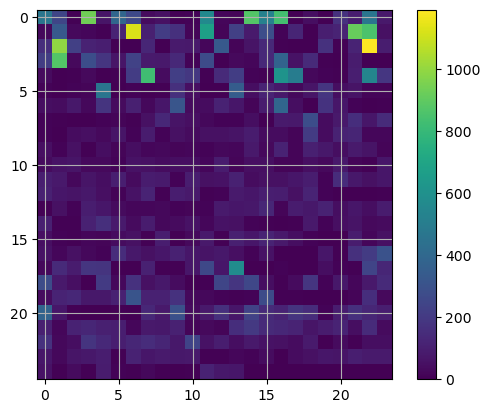

In [45]:

#uso de paquete de Numpy para generar matricesz
[xx, yy]=np.meshgrid(x,y)

#uso de plt funtions para graficar matricez
plt.figure(1)
plt.grid(True)
plt.imshow(reshaped1)
plt.show
plt.colorbar()

#print(x,y)

In [19]:
def graf_scatt(DataFrame):
    fig = go.Figure()
    fig = px.scatter(DataFrame, x="Medina_2016", y="Yepes_2016_B",
                     size="DAP", color="Especie", hover_name="Especie", size_max=55)
    fig.update_layout(transition_duration=500)
    return fig

In [8]:
figsc_v = graf_scatt(dv)
figsc_v.show()
#plt(figsc_v)